# 在保险公司中应用决策树算法进行用户分类

## 读入数据

In [3]:
import numpy as np
import pandas as pd

In [4]:
df1 = pd.read_csv(r'C:\Users\CDA\data\ma_resp_data_temp.csv', header = 0)#原始数据

In [7]:
df1.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


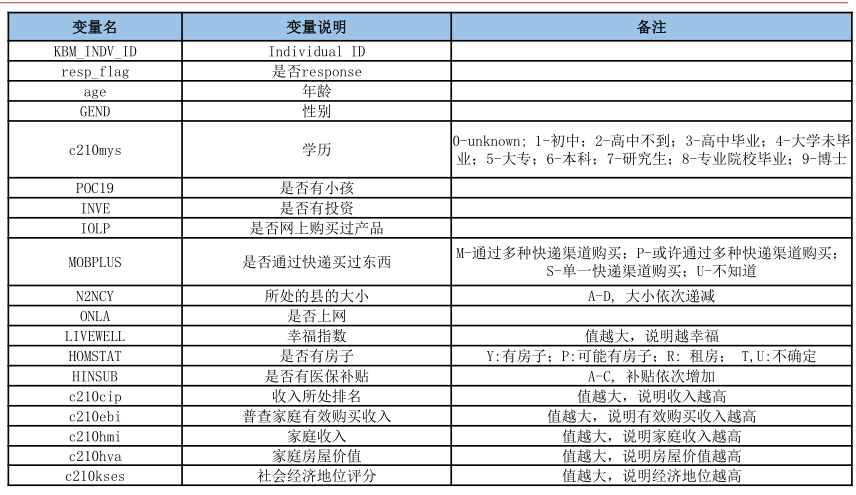

## 了解数据

In [4]:
df1.shape

(43666, 76)

In [8]:
df1.dtypes

KBM_INDV_ID      int64
resp_flag        int64
GEND            object
CA00             int64
CA03             int64
                ...   
ilor           float64
meda           float64
pdpe             int64
tins             int64
zhip19           int64
Length: 76, dtype: object

In [9]:
# 记录最初的数据类型，并保存下来，方便后面进行对比
type_first=df1.dtypes

In [11]:
type_first.to_excel( 'var_type_original.xlsx')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 76 columns):
KBM_INDV_ID    43666 non-null int64
resp_flag      43666 non-null int64
GEND           43666 non-null object
CA00           43666 non-null int64
CA03           43666 non-null int64
CA06           43666 non-null int64
CA11           43666 non-null int64
CA16           43666 non-null int64
AART           43666 non-null object
ADBT           43666 non-null object
ADEP           43666 non-null object
AHBP           43666 non-null object
AHCH           43666 non-null object
ARES           43666 non-null object
AHRT           43666 non-null object
AASN           43656 non-null object
ADGS           43666 non-null object
AHRL           43666 non-null object
ASKN           43658 non-null object
AVIS           43666 non-null object
BANK           43666 non-null object
COLLEGE        43658 non-null object
FINI           43666 non-null object
INLI           43666 non-null object
INMEDI    

注： 第一列是用户ID，这一列作为数值存在时没有意义的，我们为了查看统计信息，把这一列改成字符型

In [13]:
del df1['KBM_INDV_ID']

In [14]:
df1.describe()

,resp_flag,CA00,CA03,CA06,CA11,CA16,LIVEWELL,NOC19,NAH19,NPH19,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
count,43666.000000,43666.000000,43666.000000,43666.000000,43666.000000,43666.000000,43661.000000,43666.000000,43666.000000,43666.000000,...,43666.000000,43666.000000,43643.000000,43666.000000,43652.000000,43660.000000,43651.000000,43666.000000,43666.000000,43666.000000
mean,0.400518,0.267806,0.214034,0.381968,0.313196,0.224316,2.842125,0.465717,2.080818,2.546535,...,44.284340,60.236088,68.045597,33.283584,61.528452,18.014956,50.834872,55.574932,7.865135,4.406792
std,0.490009,0.996459,0.886914,1.178281,1.047293,0.858203,1.172255,1.045087,1.215852,1.903632,...,13.763755,24.937412,30.499882,11.962188,15.320129,19.174741,15.675964,13.204806,3.562592,3.089849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,26.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,...,35.000000,42.000000,49.000000,26.000000,51.000000,7.000000,39.000000,46.000000,5.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,...,45.000000,66.000000,78.000000,33.000000,61.000000,15.000000,51.000000,54.000000,8.000000,4.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,3.000000,...,55.000000,81.000000,95.000000,40.000000,73.000000,19.000000,61.000000,65.000000,11.000000,7.000000
max,1.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,9.000000,9.000000,16.000000,...,82.000000,99.000000,99.000000,99.000000,99.000000,99.000000,93.000000,99.000000,19.000000,9.000000


把列名作为行，把统计值左右列应该会更方便一些

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
resp_flag,43666.0,0.400518,0.490009,0.0,0.0,0.0,1.0,1.0
CA00,43666.0,0.267806,0.996459,0.0,0.0,0.0,0.0,6.0
CA03,43666.0,0.214034,0.886914,0.0,0.0,0.0,0.0,7.0
CA06,43666.0,0.381968,1.178281,0.0,0.0,0.0,0.0,7.0
CA11,43666.0,0.313196,1.047293,0.0,0.0,0.0,0.0,7.0
CA16,43666.0,0.224316,0.858203,0.0,0.0,0.0,0.0,7.0
LIVEWELL,43661.0,2.842125,1.172255,1.0,2.0,3.0,4.0,6.0
NOC19,43666.0,0.465717,1.045087,0.0,0.0,0.0,0.0,9.0
NAH19,43666.0,2.080818,1.215852,0.0,1.0,2.0,3.0,9.0
NPH19,43666.0,2.546535,1.903632,0.0,1.0,2.0,3.0,16.0


把这个统计值保存下来，方便后面查看

In [15]:
describe=df1.describe().T

describe.to_excel( 'describe_var.xlsx')

### 统计一下每一列中有多少个空值

统计有多少列中是有空值的

In [16]:
# 检查是否有缺失的列
len(df1.columns)-df1.dropna(axis =1).shape[1]

20

统计各个列中空值的数量

In [17]:
df_null_sum = df1.isnull().sum()
df_null_sum

resp_flag     0
GEND          0
CA00          0
CA03          0
CA06          0
             ..
ilor          6
meda         15
pdpe          0
tins          0
zhip19        0
Length: 75, dtype: int64

将那些不为零的数据过滤出来

In [19]:
NA=df1.isnull().sum()

In [20]:
NA=NA.reset_index()
NA

,index,0
0,resp_flag,0
1,GEND,0
2,CA00,0
3,CA03,0
4,CA06,0
...,...,...
70,ilor,6
71,meda,15
72,pdpe,0
73,tins,0


In [21]:
NA.columns=['Var','NA_count']
NA

,Var,NA_count
0,resp_flag,0
1,GEND,0
2,CA00,0
3,CA03,0
4,CA06,0
...,...,...
70,ilor,6
71,meda,15
72,pdpe,0
73,tins,0


In [30]:
# 过滤出大于0的数据
NA=NA[NA.NA_count>0].reset_index(drop=True).sort_values("NA_count",ascending=False)

In [31]:
NA

,Var,NA_count
19,c210psu,23
18,meda,15
17,c210hva,15
16,c210mah,15
15,c210wht,14
14,HINSUB,11
11,AASN,10
13,HOMSTAT,10
12,N2NCY,10
10,NY8Y9,9


In [33]:
NA.to_excel( 'var_incl_na.xls',index=False)

In [34]:
# 把空值比例，换算成比例
NA.NA_count / df1.shape[0]

19    0.000527
18    0.000344
17    0.000344
16    0.000344
15    0.000321
14    0.000252
11    0.000229
13    0.000229
12    0.000229
10    0.000206
9     0.000183
8     0.000183
7     0.000183
6     0.000160
5     0.000160
4     0.000137
3     0.000115
2     0.000115
1     0.000092
0     0.000046
Name: NA_count, dtype: float64

In [35]:
# 发现保留位数太多，改成百分比
(NA.NA_count / df1.shape[0])*100

19    0.052673
18    0.034352
17    0.034352
16    0.034352
15    0.032062
14    0.025191
11    0.022901
13    0.022901
12    0.022901
10    0.020611
9     0.018321
8     0.018321
7     0.018321
6     0.016031
5     0.016031
4     0.013741
3     0.011451
2     0.011451
1     0.009160
0     0.004580
Name: NA_count, dtype: float64

In [36]:
NA['空值百分比例'] = ((NA.NA_count / df1.shape[0])*100).round(2)

In [37]:
NA

,Var,NA_count,空值百分比例
19,c210psu,23,0.05
18,meda,15,0.03
17,c210hva,15,0.03
16,c210mah,15,0.03
15,c210wht,14,0.03
14,HINSUB,11,0.03
11,AASN,10,0.02
13,HOMSTAT,10,0.02
12,N2NCY,10,0.02
10,NY8Y9,9,0.02


**结论： 各个特征中空值所占百分比很低，没有需要因为空值太多而需要删除的列**

## 查看数据中是否有重复值

In [39]:
df1[df1.duplicated()]

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19


数据中没有完全相同的数据

## 可视化数据查看数据分布情况

In [40]:
# 引入画图模块
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
plt.style.use('seaborn')#设置样式

In [41]:
# 支持中文
plt.rcParams['font.sans-serif']=['SimHei']# 支持中文
plt.rcParams['axes.unicode_minus'] = False #正常显示字符

### 看一下目标变量是否平衡

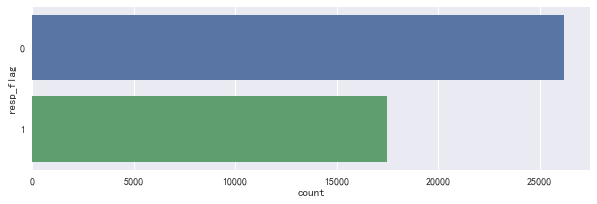

In [29]:
# 查看性别比例
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'resp_flag',data = df1)#https://www.jianshu.com/p/8bb06d3fd21b
plt.show()

**统计购买用手和未购买用户的比例关系**

In [30]:
df1.resp_flag.sum() / df1.resp_flag.shape[0]

0.4005175651536665

In [31]:
1 - df1.resp_flag.sum() / df1.resp_flag.shape[0]

0.5994824348463335

**购买保险用户相对较少一些,但相对比较平衡**

### 绘制年龄分布情况

**根据我们对于保险行业的经验, 年龄对于购买保险应该是一个非常重要的属性**

D:\conda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\conda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\conda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\conda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


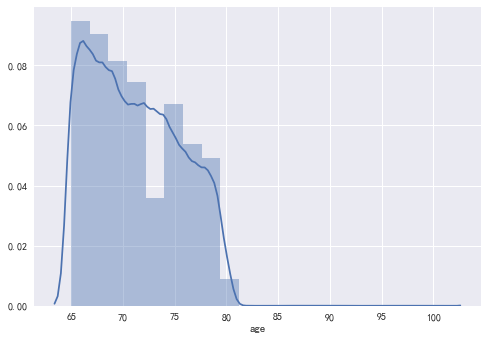

In [32]:
#https://www.cnblogs.com/feffery/p/11128113.html
sns.distplot(df1['age'],bins=20)

In [33]:
df1['age'].max()

101.0

In [34]:
df1['age'].min()

65.0

### 分别绘制两类样本的年龄分布

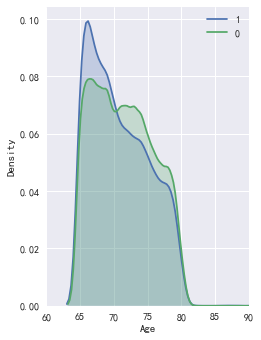

In [35]:
# 为连续型变量：年龄创建密度图 
plt.subplot(1, 2, 2)
sns.kdeplot(df1.age[df1.resp_flag==1], label='1', shade=True)
sns.kdeplot(df1.age[df1.resp_flag==0], label='0', shade=True)
plt.xlim(([60,90]))
plt.xlabel('Age');
plt.ylabel('Density');

### 查看性别比例

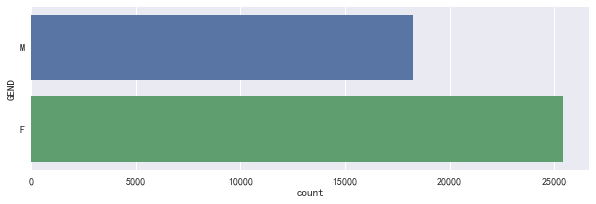

In [36]:
# 查看性别比例
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'GEND' , data = df1)
plt.show()

### 学历情况

0-unknown; 1-初中；2-高中不到；3-高中毕业；4-大学未毕业；
5-大专；6-本科；7-研究生；8-专业院校毕业；9-博士

In [43]:
df1.c210mys.value_counts()

4    18597
3    12437
6     7493
5     4474
2      462
7      130
0       60
1        9
8        4
Name: c210mys, dtype: int64

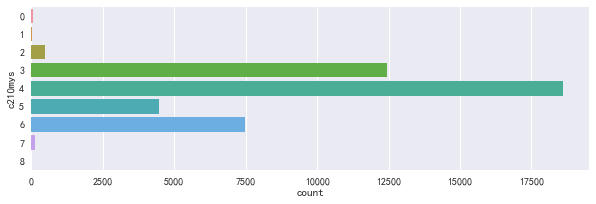

In [38]:
# 查看学历分布情况
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'c210mys' , data = df1)
plt.show()

### 查看不同的学历之间购买保险比例

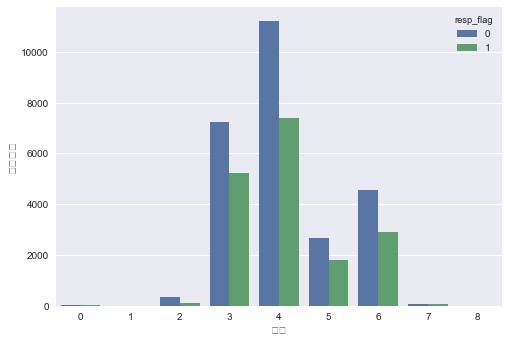

In [55]:
sns.countplot(x='c210mys', hue='resp_flag', data=df1); #设置 x,y 以及颜色控制的变量,以及画图的数据
plt.xlabel('学历');
plt.ylabel('购买数量');

### 县级别和购买比例

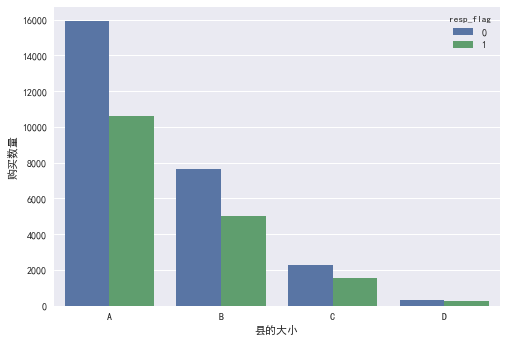

In [40]:
sns.countplot(x='N2NCY', hue='resp_flag', data=df1); #设置 x,y 以及颜色控制的变量,以及画图的数据
plt.xlabel('县的大小');
plt.ylabel('购买数量');

## 空值填充

### 练习题: 请同学们把含有空值的列中, 每一列的数据类型统计出来

**答案**

In [56]:
NA

,Var,NA_count,空值百分比例
19,c210psu,23,0.05
18,meda,15,0.03
17,c210hva,15,0.03
16,c210mah,15,0.03
15,c210wht,14,0.03
14,HINSUB,11,0.03
11,AASN,10,0.02
13,HOMSTAT,10,0.02
12,N2NCY,10,0.02
10,NY8Y9,9,0.02


In [57]:
# 首先统计一下这些特征中都属于什么数据类型
df1.age.dtypes

dtype('float64')

In [58]:
# 写一个循环依次进行判断
temp = []
for feature in NA.Var:
    temp.append(df1[feature].dtypes)

In [59]:
NA['数据类型'] = temp

In [60]:
NA

,Var,NA_count,空值百分比例,数据类型
19,c210psu,23,0.05,float64
18,meda,15,0.03,float64
17,c210hva,15,0.03,float64
16,c210mah,15,0.03,float64
15,c210wht,14,0.03,float64
14,HINSUB,11,0.03,object
11,AASN,10,0.02,object
13,HOMSTAT,10,0.02,object
12,N2NCY,10,0.02,object
10,NY8Y9,9,0.02,object


### 空值填充策略:

分类变量: 对于数据中的分类变量, 我们统一采用众数进行填充, 通常哪个分类水平出现的次数多, 这个出现的概率就是最高的.

数值型变量: 有一些变量虽然看起来是数值,但是已经是经过分箱之后的结果, 所以其实也是分类变量.

例如幸福指数LIVEWELL, 收入所处排名c210cip等

为了方便,我们把这些空值数据中,由什么样的值构成添加成一列

In [61]:
df1.c210wht.value_counts()#白领所占比例

61.0    1198
59.0    1098
63.0    1098
57.0    1072
64.0    1071
        ... 
16.0       3
11.0       2
13.0       1
1.0        1
14.0       1
Name: c210wht, Length: 91, dtype: int64

In [62]:
df1.STATE_NAME.value_counts()#年龄

CA    11700
OH     8959
NY     6481
IN     4954
CT     2873
MO     2202
WI     1884
GA     1687
KY     1375
NH      904
ME      647
Name: STATE_NAME, dtype: int64

In [63]:
df1.age.value_counts()

66.0     3967
67.0     3670
65.0     3475
69.0     3449
68.0     3423
70.0     2948
71.0     2943
72.0     2909
74.0     2817
73.0     2814
75.0     2448
76.0     2220
78.0     2038
77.0     2012
79.0     1823
80.0      691
91.0        2
86.0        2
88.0        2
96.0        1
99.0        1
82.0        1
95.0        1
90.0        1
98.0        1
87.0        1
94.0        1
101.0       1
Name: age, dtype: int64

决定, 除年龄之外的其他特征, 我们采取众数进行填充. 年龄采取均值进行填充

In [139]:
NA

,Var,NA_count,空值百分比例,数据类型
0,AASN,10,0.02,object
1,ASKN,8,0.02,object
2,COLLEGE,8,0.02,object
3,MOBPLUS,7,0.02,object
4,N2NCY,10,0.02,object
5,NY8Y9,9,0.02,object
6,POEP,8,0.02,object
7,LIVEWELL,5,0.01,float64
8,HOMSTAT,10,0.02,object
9,HINSUB,11,0.03,object


In [64]:
#首先将NA中的列名,去除掉年龄age这个
NA[NA.Var != 'age']

,Var,NA_count,空值百分比例,数据类型
19,c210psu,23,0.05,float64
18,meda,15,0.03,float64
17,c210hva,15,0.03,float64
16,c210mah,15,0.03,float64
15,c210wht,14,0.03,float64
14,HINSUB,11,0.03,object
11,AASN,10,0.02,object
13,HOMSTAT,10,0.02,object
12,N2NCY,10,0.02,object
10,NY8Y9,9,0.02,object


In [141]:
df1.AASN.mode()#返回众数

0    N
dtype: object

填充一列的代码可以用这个

df.AASN.fillna(df.AASN.mode()[0],inplace= True ) 

In [142]:
NA[NA.Var != 'age'].Var

0         AASN
1         ASKN
2      COLLEGE
3      MOBPLUS
4        N2NCY
5        NY8Y9
6         POEP
7     LIVEWELL
8      HOMSTAT
9       HINSUB
11    c210b200
12     c210cip
13     c210hmi
14     c210hva
15     c210mah
16     c210psu
17     c210wht
18        ilor
19        meda
Name: Var, dtype: object

In [65]:
# 对这些列名进行遍历, 依次进行填充
for name in NA[NA.Var != 'age'].Var:
    df1[name].fillna(df1[name].mode()[0],inplace= True)

In [66]:
# 对年龄采用平均数填充
df1.age.fillna(df1.age.mean(),inplace=True)

### 确认是否全部填充完全

In [67]:
df1.isnull().sum()

resp_flag    0
GEND         0
CA00         0
CA03         0
CA06         0
            ..
ilor         0
meda         0
pdpe         0
tins         0
zhip19       0
Length: 75, dtype: int64

## 变量编码

### 首先把用户ID列删除

In [69]:
del df1['STATE_NAME'] 

In [70]:
df1.head(10)

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,...,32,13,36.0,15,65.0,9.0,61.0,37,4,3
5,0,F,0,0,0,0,0,Y,N,N,...,37,50,80.0,32,53.0,17.0,61.0,46,14,2
6,0,F,0,0,0,0,0,N,N,N,...,61,92,99.0,35,75.0,21.0,61.0,46,12,7
7,0,M,0,0,0,0,0,N,N,N,...,45,46,99.0,19,83.0,8.0,61.0,46,4,9
8,0,M,4,1,3,0,0,N,N,N,...,30,61,99.0,25,71.0,41.0,61.0,46,9,6
9,0,F,0,0,0,0,0,N,N,N,...,19,18,99.0,4,76.0,12.0,61.0,46,2,1


In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 74 columns):
resp_flag    43666 non-null int64
GEND         43666 non-null object
CA00         43666 non-null int64
CA03         43666 non-null int64
CA06         43666 non-null int64
CA11         43666 non-null int64
CA16         43666 non-null int64
AART         43666 non-null object
ADBT         43666 non-null object
ADEP         43666 non-null object
AHBP         43666 non-null object
AHCH         43666 non-null object
ARES         43666 non-null object
AHRT         43666 non-null object
AASN         43666 non-null object
ADGS         43666 non-null object
AHRL         43666 non-null object
ASKN         43666 non-null object
AVIS         43666 non-null object
BANK         43666 non-null object
COLLEGE      43666 non-null object
FINI         43666 non-null object
INLI         43666 non-null object
INMEDI       43666 non-null object
INVE         43666 non-null object
IOLP         43666 non

In [149]:
# 我们依然采用pandas进行数据编码
df1.MOBPLUS.value_counts()#是否通过快递买过东西

M    27457
S     9947
U     3912
P     2350
Name: MOBPLUS, dtype: int64

**我们编写一个功能,可以将字符串映射为数字**

In [150]:
df1.head(10)

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,...,32,13,36.0,15,65.0,9.0,61.0,37,4,3
5,0,F,0,0,0,0,0,Y,N,N,...,37,50,80.0,32,53.0,17.0,61.0,46,14,2
6,0,F,0,0,0,0,0,N,N,N,...,61,92,99.0,35,75.0,21.0,61.0,46,12,7
7,0,M,0,0,0,0,0,N,N,N,...,45,46,99.0,19,83.0,8.0,61.0,46,4,9
8,0,M,4,1,3,0,0,N,N,N,...,30,61,99.0,25,71.0,41.0,61.0,46,9,6
9,0,F,0,0,0,0,0,N,N,N,...,19,18,99.0,4,76.0,12.0,61.0,46,2,1


In [71]:
df_object1 = df1.select_dtypes('object')#选择类型为字符型的列
df_object1.head()

,GEND,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,...,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,POC19,HOMSTAT,HINSUB
0,M,N,N,N,N,N,N,N,N,N,...,Y,N,N,N,N,N,N,Y,Y,C
1,M,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,U,Y,U
2,F,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,U,Y,U
3,F,N,N,N,N,N,N,N,N,N,...,Y,N,N,N,N,N,N,Y,Y,C
4,F,N,N,N,N,N,N,N,N,N,...,N,Y,Y,N,Y,Y,N,U,U,A


In [72]:
df_object2=df_object1.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                          #创建LabelEncoder()对象，用于序列化           
for col in df_object2.columns:                                            
    df_object2[col] = le.fit_transform(df_object2[col])        #序列化
df_object2.head()

,GEND,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,...,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,POC19,HOMSTAT,HINSUB
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,4,2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,3
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,4,2
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,1,3,0


In [155]:
df_object1.head()

,GEND,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,...,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,POC19,HOMSTAT,HINSUB
0,M,N,N,N,N,N,N,N,N,N,...,Y,N,N,N,N,N,N,Y,Y,C
1,M,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,U,Y,U
2,F,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,U,Y,U
3,F,N,N,N,N,N,N,N,N,N,...,Y,N,N,N,N,N,N,Y,Y,C
4,F,N,N,N,N,N,N,N,N,N,...,N,Y,Y,N,Y,Y,N,U,U,A


In [73]:
#原标签和labelencode如何对应
df_object=pd.DataFrame()
df_object['GEND']=df_object1['GEND']
df_object['L_GEND']=df_object2['GEND']
df_object.head()

,GEND,L_GEND
0,M,1
1,M,1
2,F,0
3,F,0
4,F,0


In [74]:
df_object.drop_duplicates().reset_index(drop=True)

,GEND,L_GEND
0,M,1
1,F,0


In [75]:
le = LabelEncoder()  
df2=df1.copy()#
for col in df2: # 对每一列进行遍历
    if df2[col].dtypes == 'object': # 如果数据类型是object类型
        for col in df2.columns:                                      
            df2[col] = le.fit_transform(df2[col])
df2.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,1,4,0,5,1,1,0,0,0,...,52,65,71,22,70,15,57,15,7,8
1,0,1,0,0,0,0,0,0,0,0,...,44,81,99,37,56,17,54,19,5,3
2,0,0,0,0,0,0,0,0,0,0,...,38,44,62,44,38,20,54,19,6,3
3,0,0,0,4,0,0,0,0,0,0,...,45,71,99,39,62,4,55,10,7,9
4,0,0,0,0,0,0,0,0,0,0,...,32,13,36,15,56,9,54,10,3,3


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 74 columns):
resp_flag    43666 non-null int64
GEND         43666 non-null int32
CA00         43666 non-null int64
CA03         43666 non-null int64
CA06         43666 non-null int64
CA11         43666 non-null int64
CA16         43666 non-null int64
AART         43666 non-null int32
ADBT         43666 non-null int32
ADEP         43666 non-null int32
AHBP         43666 non-null int32
AHCH         43666 non-null int32
ARES         43666 non-null int32
AHRT         43666 non-null int32
AASN         43666 non-null int32
ADGS         43666 non-null int32
AHRL         43666 non-null int32
ASKN         43666 non-null int32
AVIS         43666 non-null int32
BANK         43666 non-null int32
COLLEGE      43666 non-null int32
FINI         43666 non-null int32
INLI         43666 non-null int32
INMEDI       43666 non-null int32
INVE         43666 non-null int32
IOLP         43666 non-null int32
MOBPLUS

In [161]:
df2.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,1,4,0,5,1,1,0,0,0,...,52,65,71,22,70,15,57,15,7,8
1,0,1,0,0,0,0,0,0,0,0,...,44,81,99,37,56,17,54,19,5,3
2,0,0,0,0,0,0,0,0,0,0,...,38,44,62,44,38,20,54,19,6,3
3,0,0,0,4,0,0,0,0,0,0,...,45,71,99,39,62,4,55,10,7,9
4,0,0,0,0,0,0,0,0,0,0,...,32,13,36,15,56,9,54,10,3,3


## 进行机器学习建模

### 切分数据集

将数据集切分成训练数据和测试数据

In [77]:
from sklearn import tree
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [163]:
df2.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,1,4,0,5,1,1,0,0,0,...,52,65,71,22,70,15,57,15,7,8
1,0,1,0,0,0,0,0,0,0,0,...,44,81,99,37,56,17,54,19,5,3
2,0,0,0,0,0,0,0,0,0,0,...,38,44,62,44,38,20,54,19,6,3
3,0,0,0,4,0,0,0,0,0,0,...,45,71,99,39,62,4,55,10,7,9
4,0,0,0,0,0,0,0,0,0,0,...,32,13,36,15,56,9,54,10,3,3


In [78]:
X = df2.iloc[:, 1:]
y = df2['resp_flag']

In [165]:
X.head()

,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,1,4,0,5,1,1,0,0,0,0,...,52,65,71,22,70,15,57,15,7,8
1,1,0,0,0,0,0,0,0,0,0,...,44,81,99,37,56,17,54,19,5,3
2,0,0,0,0,0,0,0,0,0,0,...,38,44,62,44,38,20,54,19,6,3
3,0,0,4,0,0,0,0,0,0,0,...,45,71,99,39,62,4,55,10,7,9
4,0,0,0,0,0,0,0,0,0,0,...,32,13,36,15,56,9,54,10,3,3


In [166]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
43636    1
43637    1
43638    1
43639    1
43640    1
43641    1
43642    1
43643    1
43644    1
43645    1
43646    1
43647    1
43648    1
43649    1
43650    1
43651    1
43652    1
43653    1
43654    1
43655    1
43656    1
43657    1
43658    1
43659    1
43660    1
43661    1
43662    1
43663    1
43664    1
43665    1
Name: resp_flag, Length: 43666, dtype: int64

In [79]:
# 将数据集7：3分，70%用来建模，30%用来测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=66)

### 用默认模型试一下

In [168]:
X

,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,1,4,0,5,1,1,0,0,0,0,...,52,65,71,22,70,15,57,15,7,8
1,1,0,0,0,0,0,0,0,0,0,...,44,81,99,37,56,17,54,19,5,3
2,0,0,0,0,0,0,0,0,0,0,...,38,44,62,44,38,20,54,19,6,3
3,0,0,4,0,0,0,0,0,0,0,...,45,71,99,39,62,4,55,10,7,9
4,0,0,0,0,0,0,0,0,0,0,...,32,13,36,15,56,9,54,10,3,3
5,0,0,0,0,0,0,1,0,0,0,...,37,50,80,32,44,17,54,19,13,2
6,0,0,0,0,0,0,0,0,0,0,...,61,92,99,35,66,21,54,19,11,7
7,1,0,0,0,0,0,0,0,0,0,...,45,46,99,19,74,8,54,19,3,9
8,1,4,1,3,0,0,0,0,0,0,...,30,61,99,25,62,41,54,19,8,6
9,0,0,0,0,0,0,0,0,0,0,...,19,18,99,4,67,12,54,19,1,1


In [80]:
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5863358778625954


### 尝试调参

### 决策树中参数的含义解释如下

In [81]:
clf = tree.DecisionTreeClassifier(
            class_weight=None, #指定样本各类别的的权重，如果样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"
            criterion='gini',#特征选择标准,可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。 
            max_depth=None,#决策树最大深,常用的可以取值10-100之间。主要是限制树的增长
            max_features=None,#划分时考虑的最大特征数
            max_leaf_nodes=None,#最大叶子节点数。通过限制最大叶。这个值限制了决策树的增长
            #min_samples_leaf=3000, #叶子节点最少样本数，用于减枝
            min_samples_split=5000,#内部节点再划分所需最小样本数，这个值限制了子树继续划分的条件
            min_weight_fraction_leaf=0.0, #叶子节点最小的样本权重和。这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。
            presort=False, #数据是否预排序
            splitter='best' #特征划分点选择标准,可以使用"best"或者"random"。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。
            )


### 我们尝试使用最小叶节点样本数量和最小分割样本数量进行调参

使用roc_auc分数进行调参分数判断

In [90]:
clf = tree.DecisionTreeClassifier()

param_test={'min_samples_leaf':list(range(400,800,100)),'min_samples_split':list(range(100,1000,100))}
gsearch = GridSearchCV(estimator=clf,
                       param_grid = param_test, scoring='roc_auc',n_jobs=1,iid=False, cv=5,verbose=2)
gsearch.fit(X_train,y_train)
#gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
# gsearch.cv_results_, gsearch.best_params_, gsearch.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] min_samples_leaf=400, min_samples_split=100 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... min_samples_leaf=400, min_samples_split=100, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=100 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... min_samples_leaf=400, min_samples_split=100, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=100 .....................
[CV] ...... min_samples_leaf=400, min_samples_split=100, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=100 .....................
[CV] ...... min_samples_leaf=400, min_samples_split=100, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=100 .....................
[CV] ...... min_samples_leaf=400, min_samples_split=100, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=200 .....................
[CV] ...... min_samples_leaf=400, min_samples_split=200, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=200 .....................
[CV] ...... min_samples_leaf=400, min_samples_split=200, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=200 .....................
[CV] ...... min_samples_leaf=400, min_samples_split=200, total=   0.3s
[CV] min_samples_leaf=400, min_samples_split=200 .....................
[CV] .

[CV] ...... min_samples_leaf=500, min_samples_split=300, total=   0.2s
[CV] min_samples_leaf=500, min_samples_split=400 .....................
[CV] ...... min_samples_leaf=500, min_samples_split=400, total=   0.3s
[CV] min_samples_leaf=500, min_samples_split=400 .....................
[CV] ...... min_samples_leaf=500, min_samples_split=400, total=   0.3s
[CV] min_samples_leaf=500, min_samples_split=400 .....................
[CV] ...... min_samples_leaf=500, min_samples_split=400, total=   0.3s
[CV] min_samples_leaf=500, min_samples_split=400 .....................
[CV] ...... min_samples_leaf=500, min_samples_split=400, total=   0.3s
[CV] min_samples_leaf=500, min_samples_split=400 .....................
[CV] ...... min_samples_leaf=500, min_samples_split=400, total=   0.3s
[CV] min_samples_leaf=500, min_samples_split=500 .....................
[CV] ...... min_samples_leaf=500, min_samples_split=500, total=   0.3s
[CV] min_samples_leaf=500, min_samples_split=500 .....................
[CV] .

[CV] ...... min_samples_leaf=600, min_samples_split=600, total=   0.2s
[CV] min_samples_leaf=600, min_samples_split=600 .....................
[CV] ...... min_samples_leaf=600, min_samples_split=600, total=   0.3s
[CV] min_samples_leaf=600, min_samples_split=600 .....................
[CV] ...... min_samples_leaf=600, min_samples_split=600, total=   0.2s
[CV] min_samples_leaf=600, min_samples_split=700 .....................
[CV] ...... min_samples_leaf=600, min_samples_split=700, total=   0.3s
[CV] min_samples_leaf=600, min_samples_split=700 .....................
[CV] ...... min_samples_leaf=600, min_samples_split=700, total=   0.3s
[CV] min_samples_leaf=600, min_samples_split=700 .....................
[CV] ...... min_samples_leaf=600, min_samples_split=700, total=   0.2s
[CV] min_samples_leaf=600, min_samples_split=700 .....................
[CV] ...... min_samples_leaf=600, min_samples_split=700, total=   0.2s
[CV] min_samples_leaf=600, min_samples_split=700 .....................
[CV] .

[CV] ...... min_samples_leaf=700, min_samples_split=900, total=   0.2s
[CV] min_samples_leaf=700, min_samples_split=900 .....................
[CV] ...... min_samples_leaf=700, min_samples_split=900, total=   0.2s
[CV] min_samples_leaf=700, min_samples_split=900 .....................
[CV] ...... min_samples_leaf=700, min_samples_split=900, total=   0.2s
[CV] min_samples_leaf=700, min_samples_split=900 .....................
[CV] ...... min_samples_leaf=700, min_samples_split=900, total=   0.2s
[CV] min_samples_leaf=700, min_samples_split=900 .....................
[CV] ...... min_samples_leaf=700, min_samples_split=900, total=   0.2s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   47.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=False, n_jobs=1,
             param_grid={'min_samples_leaf': [400, 500, 600, 700],
                         'min_samples_split': [100, 200, 300, 400, 500, 6

In [91]:
gsearch.best_params_

{'min_samples_leaf': 400, 'min_samples_split': 100}

In [84]:
gsearch.best_score_

0.6548444974784641

### 尝试使用最大深度和最小叶节点数量进行调参

In [ ]:
clf = tree.DecisionTreeClassifier()

param_test= {
"max_depth": range(3,15),
'min_samples_leaf': range(200,3000,100)
    }
gsearch = GridSearchCV(estimator=clf,
                       param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=5,verbose=2)
gsearch.fit(X_train,y_train)
#gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

In [ ]:
gsearch.best_score_

In [ ]:
gsearch.best_params_

In [ ]:
gsearch.score(X_train, y_train)

In [ ]:
gsearch.score(X_test, y_test)

### 模型评估

In [ ]:
y_pred = gsearch.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred,labels=[1,0])
print('confusion matrix',cm)

#### 输出决策树

In [175]:
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini',
            max_features=None,
            max_leaf_nodes=6,
            min_impurity_decrease=0.001,
            min_samples_leaf=2500, min_samples_split=4000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=2500, min_samples_split=4000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [176]:
features= list(df2.columns[1:]) 

In [177]:
dot_data = tree.export_graphviz(clf
                    ,feature_names= features,
                    class_names=['No Purchase',"Purchase"],       #字符串列表形式，默认为空，指定目标类的名称
                     filled=True,                     #默认False，对节点着色以显示多数类
                     rounded=True,                    #默认为False，若为True，节点框为圆角且用赫维提卡体代替默认的罗马字体
                     #rotate=True,                    #默认为False，若为True，树将长成左右结构，而不是默认的上下结构
                     impurity=True,                   #默认为True，是否为每个节点输出不纯度
                     leaves_parallel=False,         #默认为False,是否在树的底部画出叶节点
                     node_ids=True
                               )

In [179]:
import graphviz
import os
os.chdir(r'D:\CDA\File\graphviz-2.38\release\bin')
graph=graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

In [104]:
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf=1000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.6399236641221374


In [105]:
features= list(df2.columns[1:]) 

In [106]:
dot_data = tree.export_graphviz(clf
                    ,feature_names= features,
                    class_names=['No Purchase',"Purchase"],       #字符串列表形式，默认为空，指定目标类的名称
                     filled=True,                     #默认False，对节点着色以显示多数类
                     rounded=True,                    #默认为False，若为True，节点框为圆角且用赫维提卡体代替默认的罗马字体
                     #rotate=True,                    #默认为False，若为True，树将长成左右结构，而不是默认的上下结构
                     impurity=True,                   #默认为True，是否为每个节点输出不纯度
                     leaves_parallel=False,         #默认为False,是否在树的底部画出叶节点
                     node_ids=True
                               )

In [107]:
import graphviz
import os
os.chdir(r'D:\CDA\File\graphviz-2.38\release\bin')
graph=graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

### 使用随机森林尝试建模

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

D:\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6393893129770992

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

1.0


0.6625954198473283

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

1.0


0.667175572519084

In [128]:
rfc = RandomForestClassifier(n_estimators=200,max_depth = 15)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

0.8954393770856507


0.6674045801526718

In [130]:
rfc = RandomForestClassifier(n_estimators=500,max_depth = 12, class_weight="balanced",
                            criterion='entropy',)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

0.7900281358372048


0.6437404580152671

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
ada = AdaBoostClassifier(n_estimators=500,)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(ada.score(X_train, y_train))
ada.score(X_test, y_test)

0.6834718314467055


0.6569465648854962

## 将数据保存下来，进行独热编码后重新尝试建模

In [272]:
# df是已经编码完成的数据集
df.to_csv('../data/data_encoder.csv')

In [267]:
# df_copy 是编码之前的数据集， 我们也进行保存
df_copy.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,Y,U,CA,76.0,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,3.0,0,1,1,U,Y,U,CA,67.0,88,4.0,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,1.0,1,4,5,Y,Y,C,CA,71.0,96,4.0,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,3.0,0,1,1,U,U,A,CA,75.0,88,4.0,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,61.0,37,4,3


In [271]:
df_copy.to_csv('../data/data_no_encoder.csv')